In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
steps=100
start_pos = 0.96
s_inc = 0.02
#1d stuff
basisvects = np.array([-s_inc,+s_inc])

#steps in out walk for now

#boundaries for folding in
boundaries = np.array([0, 1])
csize = np.diff(boundaries, axis=0).ravel()


#randomarr=basisvects[np.random.randint(0,int(basisvects.size/2),size=(numpts,steps))]
#now we do cumulativesum
#set up functions
#steps= insteps
np.random.seed(2)
numpts= int(1) #size counts both columns of our x,y matrix
#twodboundaries = np.tile(boundaries[0],(numpts,1)).T
#twodsize = np.tile(csize,(numpts,1)).T  
summarr=np.swapaxes(np.cumsum(basisvects[np.random.randint(0,int(basisvects.size),size=(numpts,steps))],axis=1),1,0) #this might have to be axis=1 now
print(np.shape(summarr))
trajectory_fold = np.abs((summarr + start_pos - boundaries[0] + csize) % (2 * csize) - csize) + boundaries[0]
trajectory_fold = np.swapaxes(trajectory_fold,1,0)
print(np.shape(trajectory_fold))
trickier = np.where(trajectory_fold[:,:].round(decimals=4) ==1.0)
print(trickier)

(100, 1)
(1, 100)
(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([13, 21, 27, 35, 41, 43, 49, 59, 67, 69, 71, 75, 79]))


### We can see that the folding in works as expected

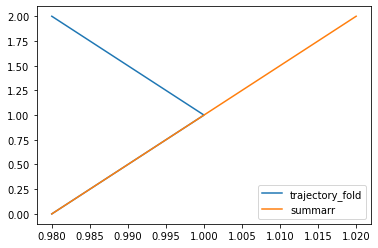

[1]


In [3]:
newfig = plt.figure()
axes = plt.axes()

axes.plot(trajectory_fold[0,12:15],np.arange(3))
axes.plot(start_pos+summarr[12:15],np.arange(3))
#axes.plot(trajectory_fold[0,:2],np.arange(2))
#axes.plot(start_pos+summarr[:2],np.arange(2))
axes.legend(['trajectory_fold','summarr'])
plt.show()
print(csize)

## Check the math on folding things into domains

Say summarrr = 0.04, start_pos = 0.98


abs(summarr + start_pos - boundaries[0] + csize) % (2 * csize) - csize) + boundaries[0]
csize = [1], I think this is an array

Then out math says be have 

abs(0.04 + 0.98 - 0 + 1) % (2*1) - 1) + 0
= abs(2.02 % 2 - 1) + 0
= abs(0.02 -1 )
= abs(-0.98) = 0.98

